In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:",path)

100%|██████████| 427M/427M [00:02<00:00, 181MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
# Importing necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')# Changed '

In [ ]:
train_path ="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path ="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [ ]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob

In [ ]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 2027.25it/s]


In [ ]:
data.shape

(22564, 2)

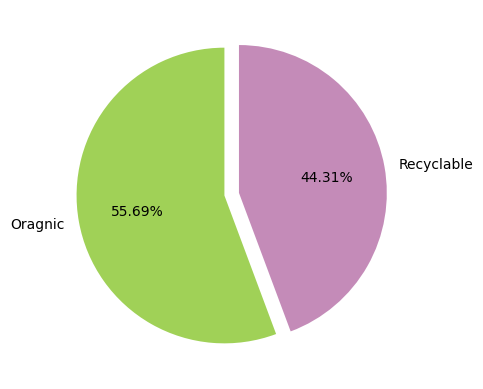

In [ ]:
colors = ['#a0d157' , '#c48bb8'] # Add '#' prefix to hexadecimal color codes
plt.pie(data.label.value_counts(), labels=['Oragnic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors,startangle = 90, explode=[0.05, 0.05])
plt.show() # Call the show function to display the plot

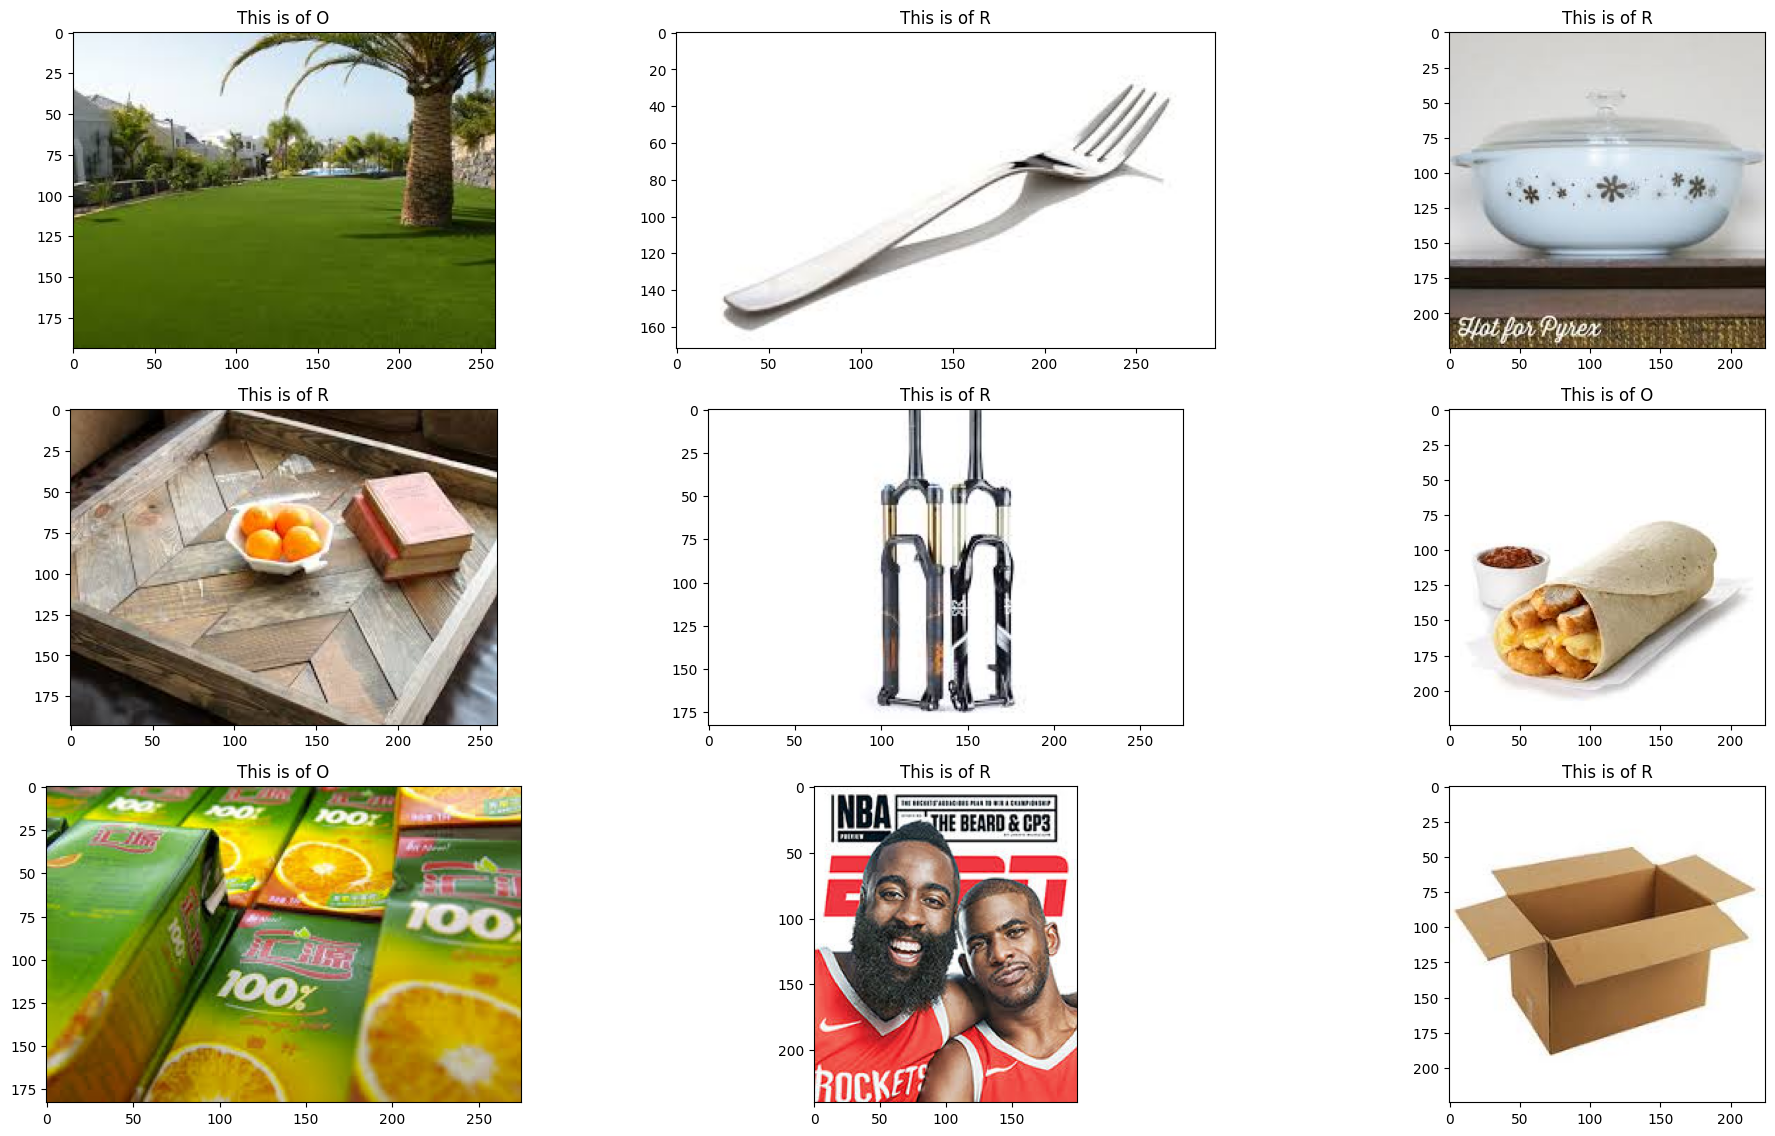

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(9):
  plt.subplot(4, 3,(i%12)+1)
  index = np.random.randint(15000)
  plt.title('This is of {0}' .format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()

In [ ]:
#Importing necessary libraries
from tensorflow.keras.models import Sequential # This line is crucial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
model = Sequential()
model.add(Conv2D(32, (3,3) , input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size=256

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode ="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator)

Epoch 1/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 89s 740ms/step - accuracy: 0.6842 - loss: 0.7564 - val_accuracy: 0.8766 - val_loss: 0.3613
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.8280 - loss: 0.4191 - val_accuracy: 0.8257 - val_loss: 0.3978
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 545ms/step - accuracy: 0.8402 - loss: 0.3868 - val_accuracy: 0.8810 - val_loss: 0.3007
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 553ms/step - accuracy: 0.8578 - loss: 0.3526 - val_accuracy: 0.8675 - val_loss: 0.3153
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 554ms/step - accuracy: 0.8694 - loss: 0.3380 - val_accuracy: 0.8587 - val_loss: 0.3437
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 555ms/step - accuracy: 0.8744 - loss: 0.3174 - val_accuracy: 0.8914 - val_loss: 0.2754
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 554ms/step - accuracy: 0.8938 - loss: 0.2826 - val_accuracy: 0.8886 - val_loss: 0.2859
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 549ms/step - accuracy: 0.8995 - loss: 0.2513 - val_accu

<function matplotlib.pyplot.show(close=None, block=None)>

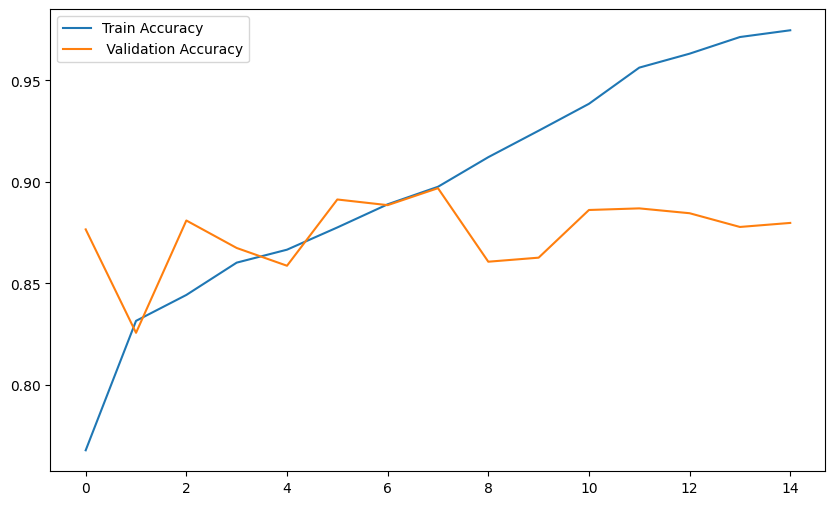

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

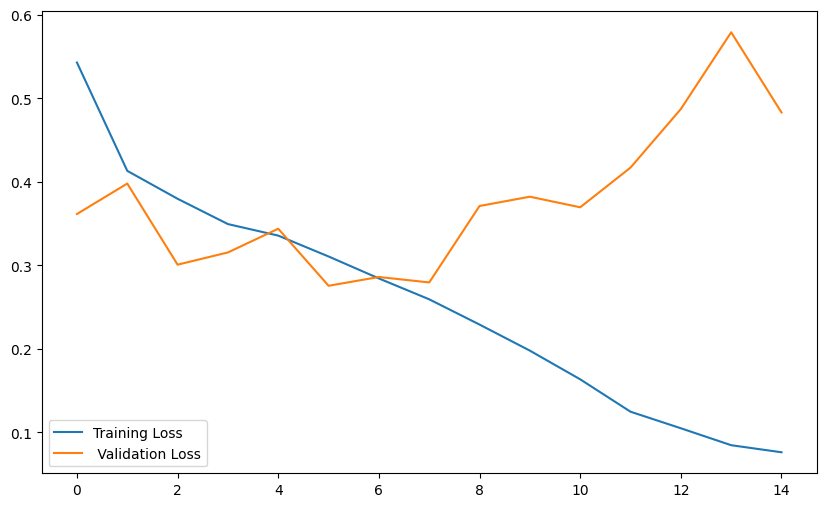

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label=' Validation Loss')
plt.legend()
plt.show

In [ ]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224,224,3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('this image show is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image shown is Organic Waste


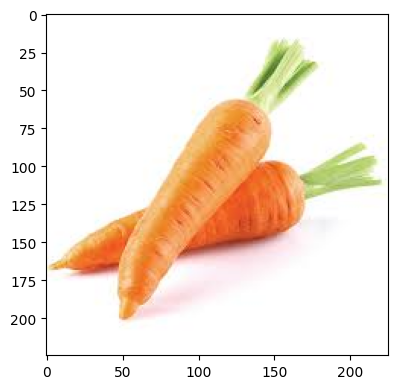

In [ ]:
test_img =cv2.imread("/content/O_12784.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The image shown is Organic Waste


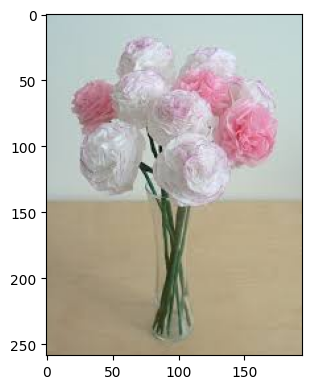

In [ ]:
test_img = cv2.imread("/content/R_11010.jpg")
predict_fun(test_img)